### 8.1 심층 신경망이 부딪힌 한계 - 사라지는 기울기
### 8.2 심층 신경망 학습의 돌파구 - 연결강도 초기화
### 8.3 활성화 함수의 다양화
### 8.4 최적화 기법 - 경사하강법의 문제와 개선
### 8.5 다양한 최적화 기법 소개
### 8.6 텐서플로우 시작


✔머신러닝과 딥러닝의 프레임워크 : 텐서플로우 , 데아노, 파이토치, 케라스, 사이킷런, NLTK

✔미국 국립표준 연구소National Institute of Standards and Technology에서는 손으로 쓴 숫자들로 이루어진 글씨 데이터를 스캐닝하여 다양한 화상처리 시스템에서 사용하기 위하여 제공하고 있는데 이 데이터가 바로 MNISTModified National Institute of Standards and Technology 데이터베이스



In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist # MNIST 이미지를 제공하는 케라스라는 모듈을 포함하고 있는데 이 이미지 셋을 가져온다.

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('x_train 데이터의 형태:', x_train.shape)
print('x_train[0] 데이터의 형태:', x_train[0].shape)
print('y_train 데이터의 형태:',y_train.shape)

11501568/11490434 [==============================] - 1s 0us/step
x_train 데이터의 형태: (60000, 28, 28)
x_train[0] 데이터의 형태: (28, 28)
y_train 데이터의 형태: (60000,)


In [2]:
num = x_train[0]
for i in range(28):
    for j in range(28):
        print('{:4d}'.format(num[i][j]), end='')
    print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

x_train의 첫번째 데이터의 형태가 (28,28)크기의 데이터 
최소 0 최댓값 255

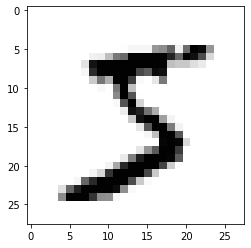

In [3]:
plt.imshow(num, cmap='Greys', interpolation='nearest')
#회색조 이미지로 만들어 이 배열의 의미 파악
#이 데이터의 형태가 기울어진 5와 비슷
#이제 다음과 같은 방법으로 부드럽게 보간된 회색조 이미지로 만들어 이 배열의 의미를 이해하자


In [4]:
print('y_train[0] =', y_train[0])
#이 배열 데이터는 숫자 5의 손글씨와 비슷한 이미지 임을 알 수 있는데, 
# 이 이미지의 의미는 다음과 같이 y_train[0] 배열에 5라고 레이블링 되어 있다.

y_train[0] = 5


y_train[0] 배열에 5라고 레이블링

### 8.8 keras로 순차 심층신경망 구축하기

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255, x_test / 255  
# 입력값 정규화 : 원래 입력값의 범위 0~255를 0에서 1사이의 값으로 조정하는 정규화 단계(그래서 255로 나누는 것)

model = keras.models.Sequential( [#Sequential모델을 사용
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = 'relu'), #은닉층 활성화 하는 함수 지정(RELU)
    keras.layers.Dense(10, activation = 'softmax'),#출력값을 확률값으로 변환하는 함수 지정(softmax)
])

# 학습을 위한 최적화 함수, 손실 함수등을 가진 모델을 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 4)

#노드와 구조 손쉽게 생성

Epoch 1/4
1875/1875 [==============================] - ETA: 0s - loss: 0.2288 - accuracy: 0.9335 ETA: 0s - loss: - 2s 918us/step - loss: 0.2258 - accuracy: 0.9344
Epoch 2/4
1875/1875 [==============================] - 2s 896us/step - loss: 0.0924 - accuracy: 0.97240s - loss: 0.0935 - accuracy: 
Epoch 3/4
1875/1875 [==============================] - 2s 901us/step - loss: 0.0605 - accuracy: 0.9817
Epoch 4/4
1875/1875 [==============================] - 2s 880us/step - loss: 0.0429 - accuracy: 0.98630s - loss: 0.0417 - accu


👍이제 MNIST 데이터를 사용하여 우리가 할 일

- 6만 개의 이미지로 이루어진 x_train 데이터를 심층 신경망 모델에 넣어서 
- y_train 데이터의 숫자로 인식하도록 학습을 시키는 일
- 이 때 노드의 활성화 함수, 학습을 위한 최적화 함수, 손실 함수, 측정방법을 정의하는 일
- 1만 개의 이미지로 이루어진 x_test 데이터를 학습을 마친 모델의 입력으로 넣어서 이 모델의 정확도를 알아보는 일


### 8.9 인공신경망을 최적화 시키자

In [9]:
model.summary()
#만든 신경망 모델이 어떤 형태를 가지고 있으며, 몇 개의 파라미터를 훈련시켜서 만든 모델인가를 model.summary() 함수를 통해서 확인


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [10]:
print('신경망 모델의 학습 결과 :')
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print('test 데이터의 손실값', eval_loss, 'test 데이터의 정확도', eval_acc)
#이제까지 학습에 사용하지 않은 1만 개의 숫자 이미지가 있는 x_test를 이 모델에 넣어서 y_test와 비교


신경망 모델의 학습 결과 :
313/313 [==============================] - 0s 720us/step - loss: 0.0729 - accuracy: 0.9781
test 데이터의 손실값 0.07285822927951813 test 데이터의 정확도 0.9781000018119812


### 8.10 소프트맥스 함수와 원-핫 인코딩

In [11]:
import numpy as np

def softmax(a):    
    exp_of_a = np.exp(a)       # 각각의 지수 함수
    sum_exp = np.sum(exp_of_a) # 지수 함수값의 합
    y = exp_of_a / sum_exp
    return y

a = np.array([0.5, 4.1, 2.5, 5.6, 1.2])
print('신경망의 예측값 :', a)
print('소프트맥스 함수의 출력 :', softmax(a))

신경망의 예측값 : [0.5 4.1 2.5 5.6 1.2]
소프트맥스 함수의 출력 : [0.00473882 0.17343248 0.03501541 0.77727047 0.00954281]


In [ ]:

#0       1    2    3    4 
#[0.5  4.1  2.5  5.6  1.2] #최종 노트 출력은 가중치 값
# -------------------
# 소프트 맥스 함수 
# -------------------
# 0.0047 0.1734 0.0350 0.7772 0.0095  #숫자 0일 확률 , 숫자 1일 확률 ,숫자 2일 확률 ,숫자 3일 확률 , 숫자 4일 확률 
# 가중치 값을 가진 벡터를 0에서 1사이의 클래스별 확률값으로 변환하기 위해서 사용하는 함수가
#  바로 소프트맥스softmax 함수



In [12]:
print('소프트맥스 함수의 최댓값 :', np.max(softmax(a)))

#소프트맥스 함수는 최대값을 더욱 활성화하고 작은 값을 억제하는 효과

소프트맥스 함수의 최댓값 : 0.7772704668966948


In [16]:
# 소프트맥스 함수의 입력값을 두 배로 증가시켜보자
a = np.array([0.5, 4.1, 2.5, 5.6, 1.2]) * 2
print('신경망의 예측값 :', a)
print('소프트맥스 함수의 출력 :', softmax(a))
print('소프트맥스 함수의 최댓값 :', np.max(softmax(a)))

신경망의 예측값 : [ 1.   8.2  5.  11.2  2.4]
소프트맥스 함수의 출력 : [3.53328547e-05 4.73259126e-02 1.92910850e-03 9.50566364e-01
 1.43281791e-04]
소프트맥스 함수의 최댓값 : 0.9505663642857384


### 8.11 원-핫 인코딩과 평균제곱 오차
✔소프트맥스 함수의 출력값과 정답과의 차이를 구하는 방법

✔이를 위하여 원-핫 인코딩one-hot encoding 기법의 필요성에 대하여 알아보자


👍원-핫 인코딩은 다음의 두 단계 과정을 통해서 간단하게 구현

- 각 레이블에 고유의 인덱스를 부여

- 표현하고자 하는 레이블의 인덱스 위치에 1을 부여하고, 나머지 인덱스의 값으로 0을 부여


In [18]:
from tensorflow.keras.utils import to_categorical

data = np.array([0, 1, 2, 3, 4])  # 수치 데이터 0에서 4까지의 값
print('인코딩할 원본 데이터',data)
encoded = to_categorical(data)    # 원-핫 인코딩된 범주형 데이터 생성
print('원-핫 인코딩된 데이터 :')
print(encoded)

# from keras.utils import to_categorical 대신
# from tensorflow.keras.utils import to_categorical을 사용하면 된다.


인코딩할 원본 데이터 [0 1 2 3 4]
원-핫 인코딩된 데이터 :
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [19]:
import numpy as np

# 정답 3이 인코딩된 target과 신경망의 예측값 y_hat이 있다고 가정하자
target = np.array([0, 0, 0, 1, 0]) #레이블 3은 원-핫 인코딩되어 [0, 0, 0, 1, 0]의 형태로 변환 
y_hat = np.array([0.005, 0.173, 0.035, 0.777, 0.01])

def mse(y, t):   # 평균제곱오차
    return ((y-t)**2).mean()

print('y_hat과 target과의 오차 :', mse(y_hat, target))

y_hat과 target과의 오차 : 0.016201599999999997


In [20]:
# 정답에서 많이 벗어난 other_y_hat 추정치
other_y_hat = np.array([0.2, 0.3, 0.4, 0.01, 0.09])
# other_y_hat 추정치와 정답과의 오차를 알아보자 
print('other_y_hat과 target과의 오차 :', mse( other_y_hat, target ))

other_y_hat과 target과의 오차 : 0.25564


### 8.12 평균제곱 오차와 교차 엔트로피 오차

손실함수(신경망의 데이터 분석결과(성능)의 나쁨 정도)
- cee : 교차 엔트로피는 평균제곱오차와는 달리 오직 실제 정답과의 오차만을 파악하는 손실함수
- mse :  y는 신경망의 출력층 결과 리스트이고 t는 실제 데이터의 정답을 의미

In [21]:
import numpy as np

def mse(y, t):   # 평균제곱오차
    return ((y-t)**2).mean()
    
# 교차 엔트로피 함수를 에러 함수로 사용해 보도록 하자
def cee(y, t):
   delta = 1e-7
   return -np.sum(t * np.log(y + delta))

t = np.array([0, 0, 1])
y_hat1 = np.array([0.4, 0.05, 0.55])
y_hat2 = np.array([0.9, 0.09, 0.01])

# y_hat 추정치와 정답과의 오차를 알아보자
print('y_hat1과의 cee : {:.2f}'.format(cee(y_hat1, t)))
print('y_hat2과의 cee : {:.2f}'.format(cee(y_hat2, t)))
print('두 값의 비 : {:.2f}'.format(cee(y_hat2, t)/cee(y_hat1, t)))

# y_hat 추정치와 정답과의 오차를 알아보자
print('y_hat1과의 mse : {:.2f}'.format(mse(y_hat1, t)))
print('y_hat2과의 mse : {:.2f}'.format(mse(y_hat2, t)))
print('두 값의 비 : {:.2f}'.format(mse(y_hat2, t)/mse(y_hat1, t)))

y_hat1과의 cee : 0.60
y_hat2과의 cee : 4.61
두 값의 비 : 7.70
y_hat1과의 mse : 0.12
y_hat2과의 mse : 0.60
두 값의 비 : 4.93


### 8.13 정규화와 표준화, 배치 정규화

Text(0, 0.5, 'num of rooms')

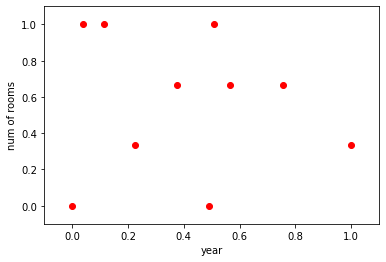

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

yr = np.array([15, 30, 23, 5, 9, 43, 33, 29, 3, 56]) 
# 데이터를 살펴보면 주택의 건축연도는 3년에서 56년으로 범위가 크다.
n_rooms = np.array([2, 4, 3, 4, 4, 3, 3, 1, 1, 2])
# 방의 수 
min_max_scaler = MinMaxScaler()
yr_norm = min_max_scaler.fit_transform(yr[:, np.newaxis])
n_rooms_norm = min_max_scaler.fit_transform(n_rooms[:, np.newaxis])

#위의 경우를 그래프로 그려보면 아래와 같이 나타날 것
#이 경우 기계 학습이 예측을 할 때 방의 개수보다는 더 큰 스케일을가지는 건축연도에 의하여 예측값이 좌지우지될 가능성이 큼
# sklearn의preprocessing 하위 모듈에 있는 min_max_scaler()를 사용하여 방의 수와 연도를
# 0에서 1사이의 값으로 스케일링하고 시각화 시킨 것

plt.scatter(yr_norm, n_rooms_norm, c='red')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.xlabel('year')              
plt.ylabel('num of rooms')


### 8.14 확률적 경사 하강법과 배치 학습

### 8.15 더 깊은 층으로 정확도를 높여보자